<a href="https://colab.research.google.com/github/TaeWoongYoun/dataAnalysis/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade yfinance
import yfinance as yf
tsla = yf.download('TSLA', start='2018-01-01', end='2022-12-31')
tsla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.59
    Uninstalling yfinance-0.2.59:
      Successfully uninstalled yfinance-0.2.59
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000
2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500
2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500
2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000
2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000
...,...,...,...,...,...
2022-12-23,123.150002,128.619995,121.019997,126.370003,166989700
2022-12-27,109.099998,119.669998,108.760002,117.500000,208643400


<Axes: xlabel='Date'>

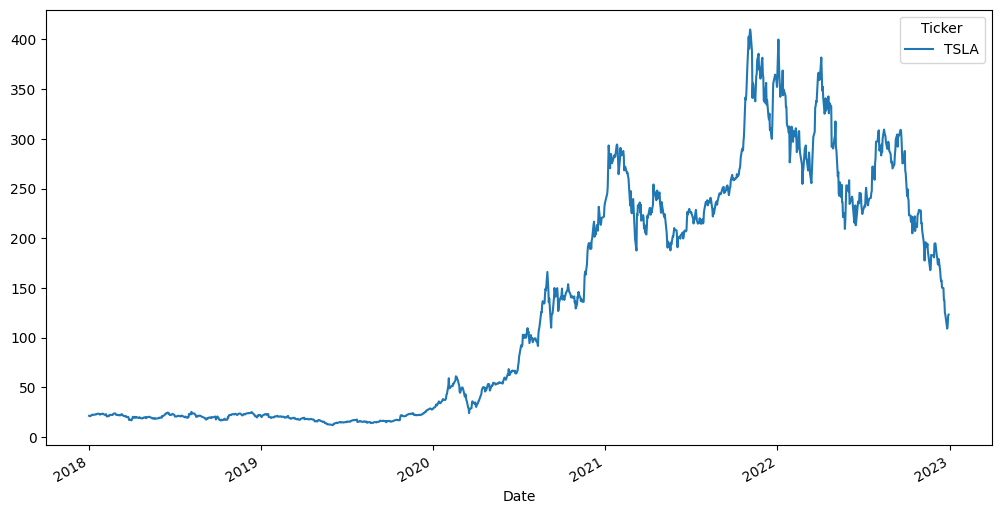

In [2]:
import pandas as pd
df_tsla = pd.DataFrame(tsla['Close'])

import matplotlib.pyplot as plt
df_tsla.plot(figsize=(12.2, 6.4))

In [3]:
from statsmodels.tsa.stattools import adfuller
print('ADF test with TSLA time-serise')
ADF_result = adfuller(df_tsla.values)
print('ADF Stats: %f' %ADF_result[0])
print('p-values: %f' %ADF_result[1])
print('Critical Values:')
for key, value in ADF_result[4].items():
  print('\t%s: %.4f' %(key, value))

ADF test with TSLA time-serise
ADF Stats: -1.301076
p-values: 0.628680
Critical Values:
	1%: -3.4356
	5%: -2.8639
	10%: -2.5680


In [4]:
from statsmodels.tsa.stattools import kpss
print("kpss test with TSLA time-series")
kpss_result = kpss(df_tsla.values)
print("kpss Stats: %f" %kpss_result[0])
print("p-values: %f" %kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
  print('\t%s: %.4f' %(key, value))

kpss test with TSLA time-series
kpss Stats: 4.913280
p-values: 0.010000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390


<ipython-input-4-bc905f00511f>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df_tsla.values)


In [5]:
!pip install pydataset
from pydataset import data
data()
air = data('AirPassengers')
data('AirPassengers', show_doc=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=bbe761265deaf54e1be15fdd1e97f603d9d3dddf8cd3f1c6641fa9732cc57f95
  Stored in directory: /root/.cache/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/
AirPassengers

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Airline Passenger Numbers 1949-1960

### Description

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

### Usage

    AirPassengers

### Format

A monthly time series, in thousands.

### Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis,
Forecasting and Control._ Third Edition. Holden-Day. Series G.

### Examples

    ## Not r

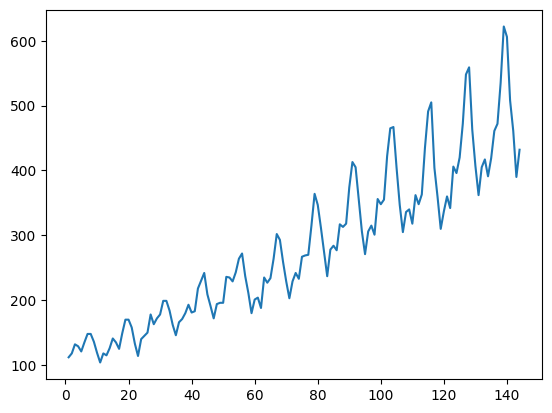

In [6]:
import matplotlib.pyplot as plt
data = air['AirPassengers']
plt.plot(data)
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
print('ADF test with AirPassengers time-series')
ADF_result = adfuller(data)
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])
print('Critical Values:')
for key, value in ADF_result[4].items():
  print('\t%s: %.4f' % (key, value))

ADF test with AirPassengers time-series
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.4817
	5%: -2.8840
	10%: -2.5788


In [8]:
from statsmodels.tsa.stattools import kpss
print('KPSS test with AirPassengers time-series')
KPSS_result = kpss(data)
print('KPSS Statistic: %f' % KPSS_result[0])
print('p-value: %f' % KPSS_result[1])
print('Critical Values:')
for key, value in KPSS_result[3].items():
  print('\t%s: %.4f' % (key, value))

KPSS test with AirPassengers time-series
KPSS Statistic: 1.651312
p-value: 0.010000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390


<ipython-input-8-664aa848147e>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_result = kpss(data)


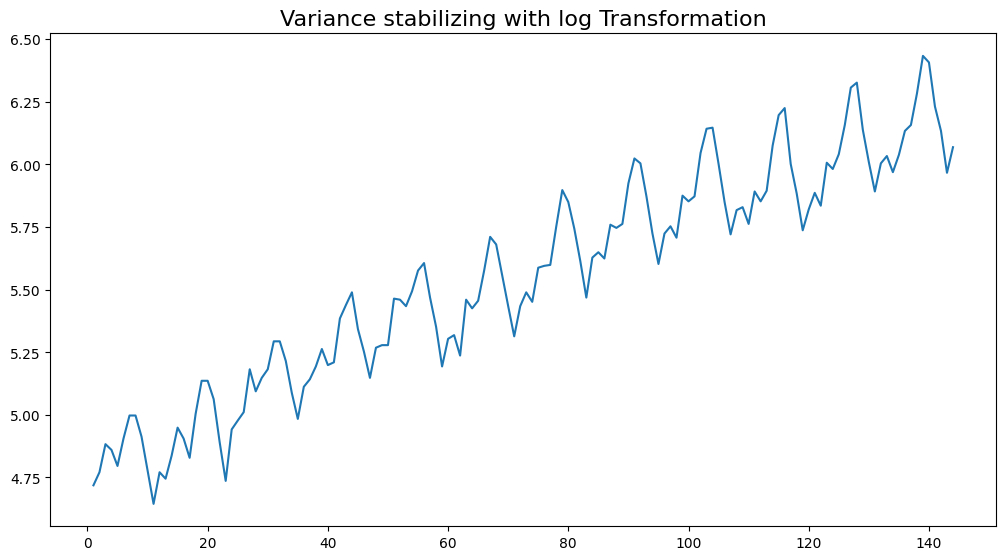

In [9]:
import numpy as np
df_log_air = np.log(air['AirPassengers'])
df_log_air.head()
df_log_air.plot(figsize=(12.2,6.4))
plt.title('Variance stabilizing with log Transformation', fontsize=16)
plt.show()


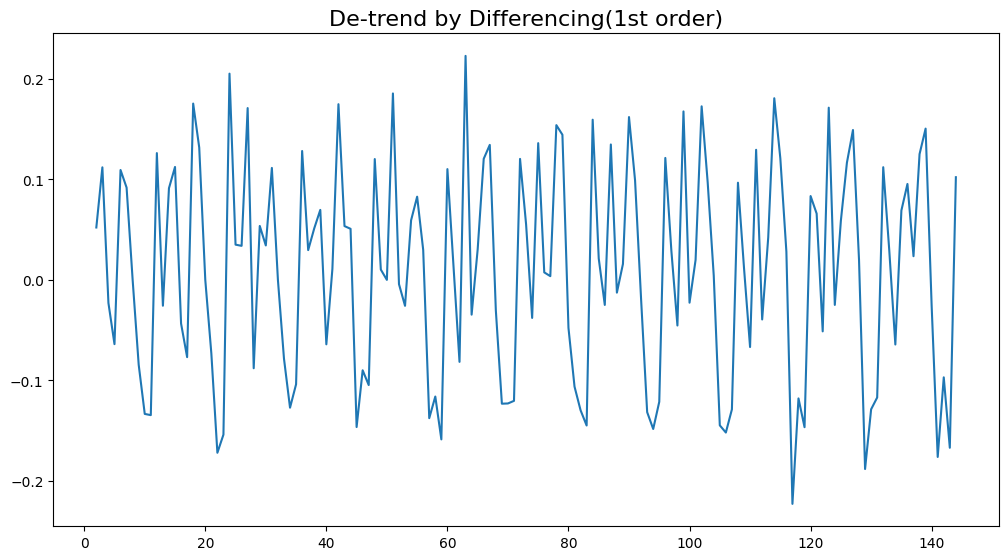

In [10]:
df_log_air_diff = df_log_air.diff(1).dropna()
df_log_air_diff.plot(figsize=(12.2,6.4))
plt.title('De-trend by Differencing(1st order)',fontsize=16)
plt.show()

In [11]:
print('ADF test with AirPassengers time-series')
ADF_result_diff = adfuller(df_log_air_diff)
print('ADF Statistic: %f' % ADF_result_diff[0])
print('p-value: %f' % ADF_result_diff[1])
print('Critical Values:')
for key, value in ADF_result_diff[4].items():
  print('\t%s: %.4f' % (key, value))

ADF test with AirPassengers time-series
ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.4825
	5%: -2.8844
	10%: -2.5790


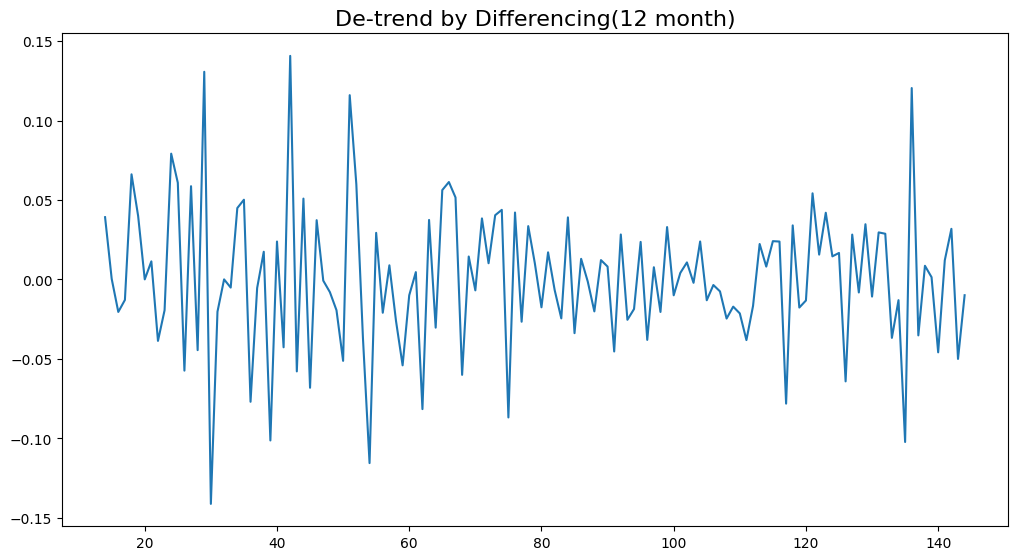

In [12]:
df_log_air_diff_season = df_log_air_diff.diff(12).dropna()
df_log_air_diff_season.plot(figsize=(12.2,6.4))
plt.title('De-trend by Differencing(12 month)', fontsize=16)
plt.show()

In [13]:
print('ADF test with AirPassengers time-series')
ADF_result_diff_season = adfuller(df_log_air_diff_season)
print('ADF stats: %f' % ADF_result_diff_season[0])
print('p-value: %f' % ADF_result_diff_season[1])
print('Critical Values:')
for key, value in ADF_result_diff_season[4].items():
  print('\t%s: %.4f' % (key, value))

ADF test with AirPassengers time-series
ADF stats: -4.443325
p-value: 0.000249
Critical Values:
	1%: -3.4870
	5%: -2.8864
	10%: -2.5800


In [14]:
print('KPSS test with AirPassengers time-series')
KPSS_result_diff_season = kpss(df_log_air_diff_season)
print('KPSS stats: %f' % KPSS_result_diff_season[0])
print('p-value: %f' % KPSS_result_diff_season[1])
print('Critical Values:')
for key, value in KPSS_result_diff_season[3].items():
  print('\t%s: %.4f' % (key, value))

KPSS test with AirPassengers time-series
KPSS stats: 0.073191
p-value: 0.100000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390


<ipython-input-14-6a1be0985654>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_result_diff_season = kpss(df_log_air_diff_season)


In [15]:
pip install --upgrade yfinance

In [1]:
import pandas as pd
import yfinance as yf

tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])
df_tsla.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,TSLA
Date,
2021-11-01,402.863342
2021-11-02,390.666656
2021-11-03,404.619995
2021-11-04,409.970001
2021-11-05,407.363342


In [2]:
df_tsla = df_tsla.reset_index()
df_tsla.columns = ['date','value']
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

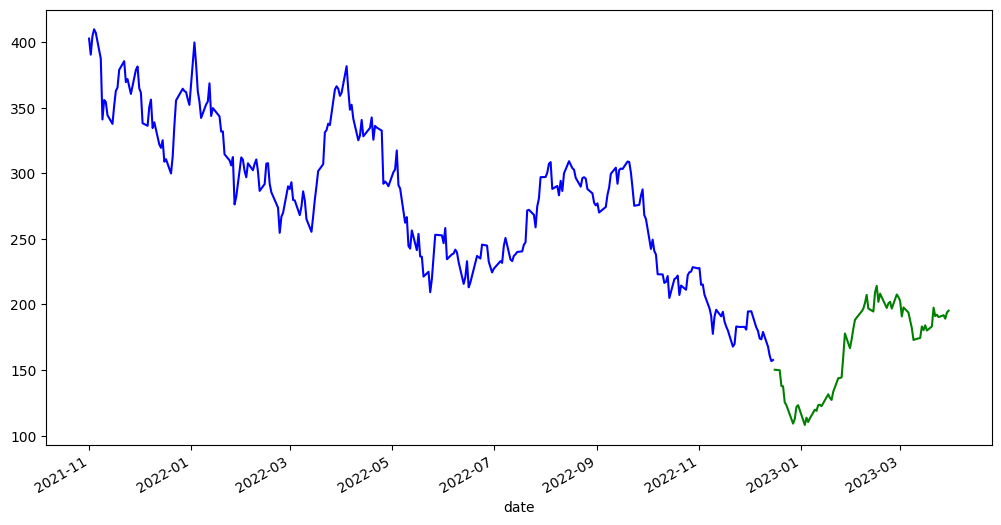

In [3]:
import matplotlib.pyplot as plt

df_tsla_train = pd.DataFrame(df_tsla['value'][:int(0.8*len(df_tsla))])
df_tsla_test = pd.DataFrame(df_tsla['value'][int(0.8*len(df_tsla)):])
df_tsla_train['date'] = df_tsla['date'][:int(0.8*len(df_tsla))]
df_tsla_test['date'] = df_tsla['date'][int(0.8*len(df_tsla)):]
df_tsla_train.set_index('date', inplace=True)
df_tsla_test.set_index('date', inplace=True)
df_tsla_train['value'].plot(figsize=(12.2, 6.4), color='blue')
df_tsla_test['value'].plot(color='green')
plt.show()

In [4]:
!pip install numpy==1.23.5 --force-reinstall
!pip uninstall -y pmdarima
!pip install pmdarima --no-cache-dir

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.8 MB/s eta 0:00:00


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from pmdarima.arima import ndiffs, nsdiffs
print(f"최적의 차분 횟수 (ADF): {ndiffs(df_tsla_train, test='adf')}")
print(f"최적의 차분 횟수 (KPSS): {ndiffs(df_tsla_train, test='kpss')}")
print(f"최적의 차분 횟수 (PP): {ndiffs(df_tsla_train, test='pp')}")

최적의 차분 횟수 (ADF): 1
최적의 차분 횟수 (KPSS): 1
최적의 차분 횟수 (PP): 1


In [7]:
print(f"최적의 차분 계수 (OSCB): {nsdiffs(df_tsla_train, m=12, test='ocsb')}")
print(f"최적의 차분 계수 (CH): {nsdiffs(df_tsla_train, m=12, test='ch')}")

최적의 차분 계수 (OSCB): 0
최적의 차분 계수 (CH): 0


In [8]:
#from statsmodels.tsa.arima_model import ARIMA  # 이건 사실 필요 없음, pm.auto_arima로 충분함
import pmdarima as pm

n_diffs = 1

model_fit = pm.auto_arima(
    y=df_tsla_train['value'],
    d=n_diffs,
    start_p=0, max_p=2,
    start_q=0, max_q=2,
    m=1,
    seasonal=False,
    stepwise=True,
    trace=True
)

print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2197.802, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2199.194, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2199.177, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2197.357, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2200.676, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.442 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1097.679
Date:                Wed, 14 May 2025   AIC                           2197.357
Time:                        04:24:03   BIC                           2201.003
Sample:                             0   HQIC                          2198.819
                                - 284                                       

In [9]:
tsla_pred = model_fit.predict(n_periods=len(df_tsla_test))
df_tsla_pred = pd.DataFrame(tsla_pred)
result = pd.DataFrame(df_tsla_test['value'].values,index=df_tsla_test.index, columns=['value'])
result

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,value
date,
2022-12-16,150.229996
2022-12-19,149.869995
2022-12-20,137.800003
2022-12-21,137.570007
2022-12-22,125.349998
...,...
2023-03-24,190.410004
2023-03-27,191.809998
2023-03-28,189.190002


In [10]:
def each_step_prediction():
    pred_next = model_fit.predict(n_periods=1)
    return pred_next.tolist()[0]

pred_steps = []

for new_inst in df_tsla_test['value']:
    pred = each_step_prediction()
    pred_steps.append(pred)
    model_fit.update(new_inst)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


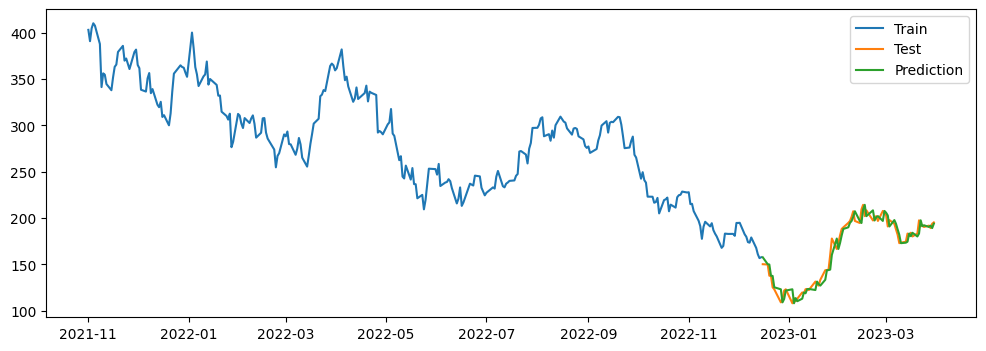

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(df_tsla_train.index, df_tsla_train['value'], label='Train')
plt.plot(df_tsla_test.index, df_tsla_test['value'], label='Test')
plt.plot(df_tsla_test.index, pred_steps, label='Prediction')
plt.legend()
plt.show()

In [12]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.23.5 pmdarima==1.8.5
!pip install tensorflow==2.12.0

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 639.7/639.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pmdarima
  Running setup.py clean for pmdarima
Failed to build pmdarima
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pmdarima)
  Using cached

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras import Sequential # 순차 모델 생성용 클래스
from tensorflow.keras.layers import Dense, LSTM, Dropout # 완전연결층, LSTM층, 과적합 방지를 위한 드롭아웃층
tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])
df_tsla = df_tsla.reset_index()
df_tsla.columns = ['date','value']
df_tsla['date'] = pd.to_datetime(df_tsla['date']) #f_tsla['date'] = pd.to_datetime(df_tsla['date']) #df? 54p
df_tsla.set_index('date', inplace=True)


[*********************100%***********************]  1 of 1 completed


In [4]:
df_tsla.reset_index()
dataset_tsla = df_tsla.values
#데이터 분할하기
df_tsla_train = dataset_tsla[:int(0.8*len(dataset_tsla)), :]
df_tsla_test = dataset_tsla[int(0.8*len(dataset_tsla)):, :]
#데이터 스케일링하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_tsla)

In [5]:
x_train_data, y_train_data = [], []
#28일을 기준으로 데이터 생성하기
for i in range(28, len(df_tsla_train)):
  x_train_data.append(scaled_data[i-28:i, 0])
  y_train_data.append(scaled_data[i, 0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [7]:
lstm_tsla = Sequential()
lstm_tsla.add(LSTM(units=28, return_sequences=True,
input_shape=(x_train_data.shape[1], 1)))
lstm_tsla.add(LSTM(units=28))
lstm_tsla.add(Dense(1))
#데이터 재가공하기
inputs_data = df_tsla[len(df_tsla) - len(df_tsla_test) - 28:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)
#모형의 학습 방법 설정하여 학습 진행하기
lstm_tsla.compile(loss='mean_squared_error', optimizer='adam')
lstm_tsla.fit(x_train_data, y_train_data, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
256/256 - 9s - loss: 0.0132 - 9s/epoch - 34ms/step
Epoch 2/100
256/256 - 5s - loss: 0.0061 - 5s/epoch - 18ms/step
Epoch 3/100
256/256 - 4s - loss: 0.0046 - 4s/epoch - 16ms/step
Epoch 4/100
256/256 - 4s - loss: 0.0039 - 4s/epoch - 16ms/step
Epoch 5/100
256/256 - 5s - loss: 0.0034 - 5s/epoch - 18ms/step
Epoch 6/100
256/256 - 4s - loss: 0.0034 - 4s/epoch - 16ms/step
Epoch 7/100
256/256 - 4s - loss: 0.0029 - 4s/epoch - 16ms/step
Epoch 8/100
256/256 - 6s - loss: 0.0027 - 6s/epoch - 24ms/step
Epoch 9/100
256/256 - 6s - loss: 0.0030 - 6s/epoch - 24ms/step
Epoch 10/100
256/256 - 5s - loss: 0.0025 - 5s/epoch - 18ms/step
Epoch 11/100
256/256 - 4s - loss: 0.0024 - 4s/epoch - 17ms/step
Epoch 12/100
256/256 - 4s - loss: 0.0024 - 4s/epoch - 16ms/step
Epoch 13/100
256/256 - 5s - loss: 0.0028 - 5s/epoch - 18ms/step
Epoch 14/100
256/256 - 4s - loss: 0.0020 - 4s/epoch - 16ms/step
Epoch 15/100
256/256 - 4s - loss: 0.0020 - 4s/epoch - 16ms/step
Epoch 16/100
256/256 - 6s - loss: 0.0018 - 6s/epo

In [8]:
X_test = []
for i in range(28, inputs_data.shape[0]):
    X_test.append(inputs_data[i-28:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_value = lstm_tsla.predict(X_test)
predicted_value = scaler.inverse_transform(predicted_value)

3/3 [==============================] - 2s 7ms/step


<ipython-input-9-0934189a122d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tsla_test_vis['Predictions'] = predicted_value


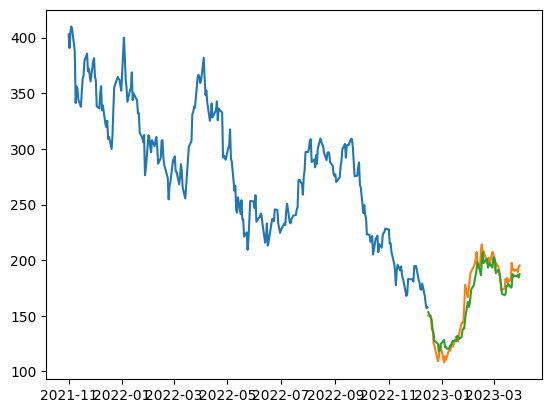

In [9]:
df_tsla_train_vis = tsla[:284]
df_tsla_test_vis = tsla[284:]
df_tsla_test_vis['Predictions'] = predicted_value
plt.plot(df_tsla_train_vis["Close"])
plt.plot(df_tsla_test_vis[["Close","Predictions"]])